<a href="https://colab.research.google.com/github/alikaramvand/Multivariate-Analysis--Oil-Price-Prediction-Using-LSTM-GRU-/blob/master/Transport_data01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/CSVPATH/Alldataoftransportation.csv"
oil_df = pd.read_csv(path)
# 1. خواندن داده‌ها
data = pd.read_csv(path)

Mounted at /content/drive


In [3]:
# تغییر نام ستون‌ها به انگلیسی
data = data.rename(columns={
    "کد محور": "Road_ID",
    "نام محور": "Road_Name",
    "زمان شروع": "Start_Time",
    "زمان پایان": "End_Time",
    "مدت زمان کارکرد (دقیقه)": "Duration_Minutes",
    "تعداد کل وسیله نقلیه": "Total_Vehicles",
    "تعداد وسیله نقلیه کلاس 1": "Class1_Vehicles",
    "تعداد وسیله نقلیه کلاس 2": "Class2_Vehicles",
    "تعداد وسیله نقلیه کلاس 3": "Class3_Vehicles",
    "تعداد وسیله نقلیه کلاس 4": "Class4_Vehicles",
    "تعداد وسیله نقلیه کلاس 5": "Class5_Vehicles",
    "سرعت متوسط": "Average_Speed",
    "تعداد تخلف سرعت غیر مجاز": "Speed_Violations",
    "تعداد تخلف فاصله غیر مجاز": "Distance_Violations",
    "تعداد تخلف سبقت غیر مجاز": "Overtake_Violations",
    "تعداد برآورد شده": "Estimated_Vehicles"
})

In [4]:

# انتخاب ستون‌های عددی برای تحلیل همبستگی
columns = [
    "Total_Vehicles",
    "Class1_Vehicles",
    "Class2_Vehicles",
    "Class3_Vehicles",
    "Class4_Vehicles",
    "Class5_Vehicles",
    "Average_Speed",
    "Speed_Violations",
    "Distance_Violations"
]

In [5]:

# حذف ستون Overtake_Violations
data = data.drop(columns=["Overtake_Violations"], errors='ignore')




In [6]:
# محاسبه ماتریس همبستگی
corr_matrix = data[columns].corr(method="pearson")

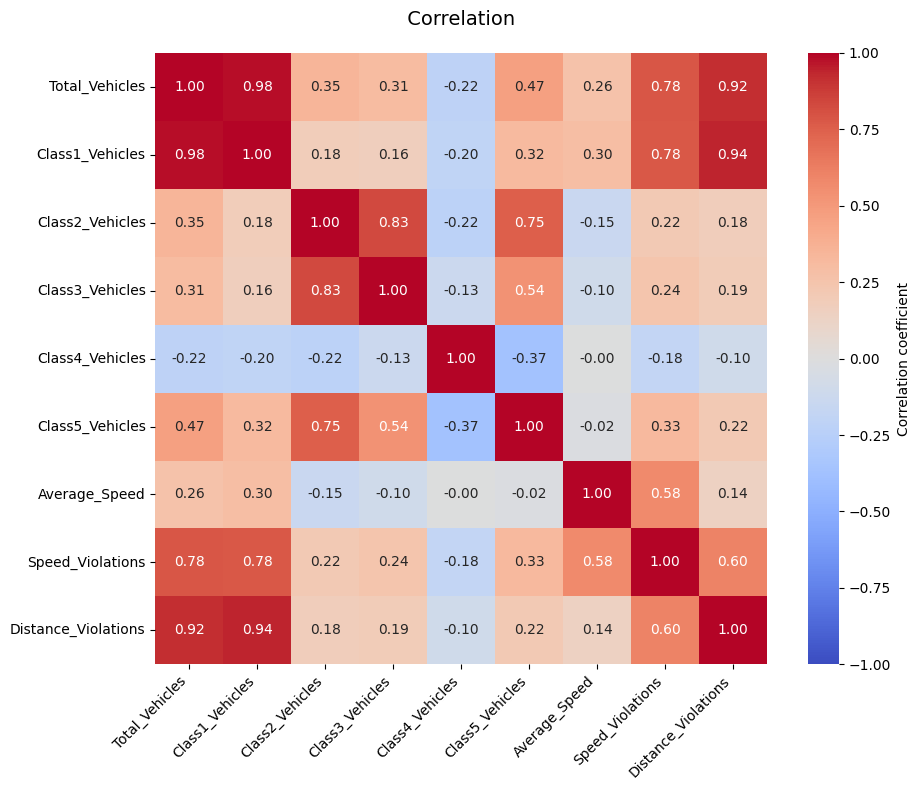

In [7]:
# محاسبه ماتریس همبستگی


# رسم ماتریس همبستگی با heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,  # نمایش مقادیر همبستگی
    cmap="coolwarm",  # پالت رنگی
    vmin=-1, vmax=1,  # محدوده مقادیر
    center=0,
    fmt=".2f",  # فرمت اعداد
    square=True,  # مربعی کردن سلول‌ها
    cbar_kws={"label": "Correlation coefficient"},
)
plt.title(" Correlation ", fontsize=14, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

In [8]:
# ذخیره ماتریس همبستگی به‌صورت فایل متنی
with open("correlation_matrix.txt", "w", encoding="utf-8") as f:
    f.write("Correlation Matrix of Traffic Variables on Zanjan-Qazvin Freeway\n")
    f.write("=" * 60 + "\n")
    f.write(corr_matrix.to_string(float_format="%.2f"))
    f.write("\n" + "=" * 60)

In [9]:
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

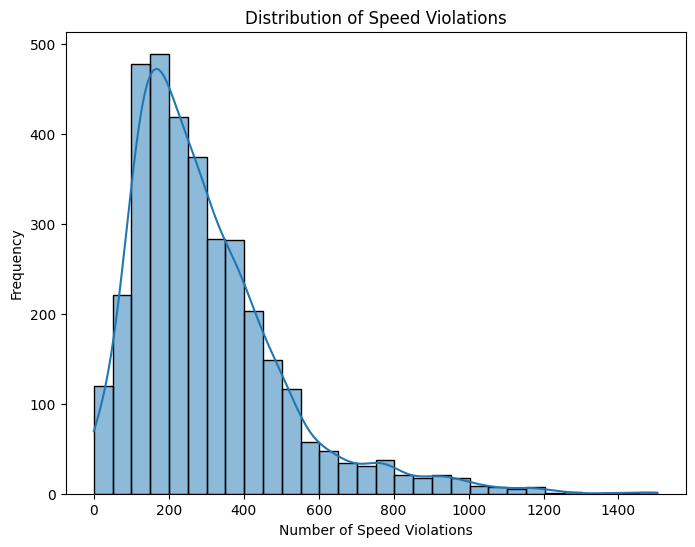

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data["Speed_Violations"], bins=30, kde=True)
plt.title("Distribution of Speed Violations")
plt.xlabel("Number of Speed Violations")
plt.ylabel("Frequency")
plt.savefig("speed_violation_hist.png", dpi=300)
plt.show()

In [11]:
# محاسبه آمار توصیفی
desc_stats = data[columns].describe()
print(desc_stats)

# ذخیره آمار توصیفی به فایل متنی
with open("descriptive_stats.txt", "w", encoding="utf-8") as f:
    f.write("Descriptive Statistics of Traffic Variables\n")
    f.write("=" * 50 + "\n")
    f.write(desc_stats.to_string(float_format="%.2f"))
    f.write("\n" + "=" * 50)

       Total_Vehicles  Class1_Vehicles  Class2_Vehicles  Class3_Vehicles  \
count     3455.000000      3455.000000      3455.000000      3455.000000   
mean       945.449204       706.896382        72.992764        31.023444   
std        570.991036       533.703976        38.842282        25.515173   
min          1.000000         1.000000         0.000000         0.000000   
25%        558.000000       369.000000        47.000000        17.000000   
50%        855.000000       591.000000        70.000000        29.000000   
75%       1198.000000       885.500000        96.000000        42.500000   
max       5388.000000      5083.000000       609.000000       755.000000   

       Class4_Vehicles  Class5_Vehicles  Average_Speed  Speed_Violations  \
count      3455.000000      3455.000000    3455.000000       3455.000000   
mean         17.791896       116.744718      94.775687        297.416208   
std          16.650912        61.164545       6.340629        204.311921   
min        

In [12]:
pip install jdatetime

In [13]:
import jdatetime



In [14]:

# تبدیل تاریخ شمسی به میلادی
def convert_shamsi_to_gregorian(date_str):
    try:
        date_part, time_part = date_str.split(" ")
        year, month, day = map(int, date_part.split("/"))
        j_date = jdatetime.date(year, month, day)
        g_date = j_date.togregorian()
        return pd.to_datetime(f"{g_date.year}-{g_date.month:02d}-{g_date.day:02d} {time_part}")
    except (ValueError, AttributeError, TypeError):
        return pd.NaT

data["Start_Time"] = data["Start_Time"].apply(convert_shamsi_to_gregorian)
data = data.dropna(subset=["Start_Time"])  # حذف تاریخ‌های نامعتبر

# حذف ستون Overtake_Violations
data = data.drop(columns=["Overtake_Violations"], errors='ignore')

In [15]:


# استخراج ویژگی‌های زمانی
data["Start_Time"] = pd.to_datetime(data["Start_Time"])
data["Hour"] = data["Start_Time"].dt.hour
data["Day_of_Week"] = data["Start_Time"].dt.dayofweek  # 0=دوشنبه، 6=یکشنبه



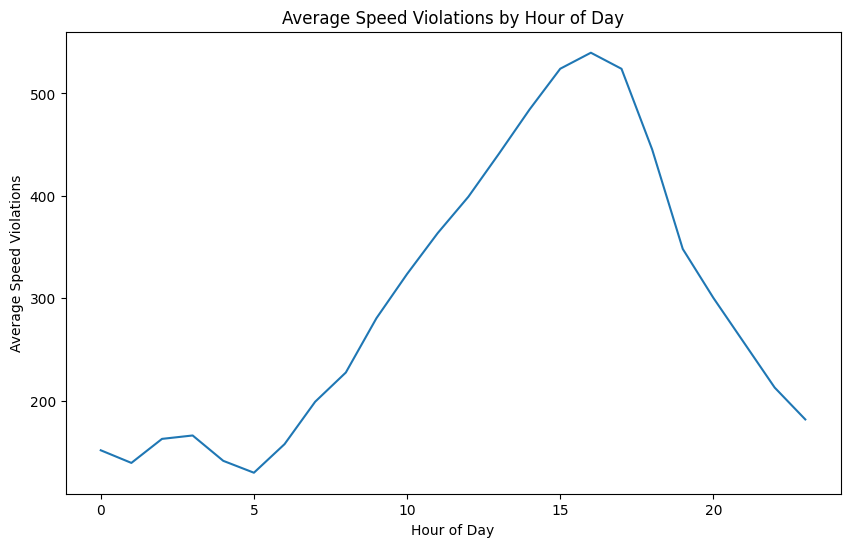

In [16]:

# رسم میانگین تخلفات سرعت بر اساس ساعت روز
hourly_avg = data.groupby("Hour")["Speed_Violations"].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title("Average Speed Violations by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Speed Violations")
plt.savefig("hourly_speed_violations.png", dpi=300)
plt.show()

In [17]:
# ذخیره میانگین ساعتی به فایل متنی
with open("hourly_speed_violations.txt", "w", encoding="utf-8") as f:
    f.write("Average Speed Violations by Hour of Day\n")
    f.write("=" * 50 + "\n")
    f.write(hourly_avg.to_string(float_format="%.2f"))
    f.write("\n" + "=" * 50)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# انتخاب ستون‌های عددی برای VIF
X = data[columns].dropna()
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# ذخیره VIF به فایل متنی
with open("vif_analysis.txt", "w", encoding="utf-8") as f:
    f.write("Variance Inflation Factor (VIF) Analysis\n")
    f.write("=" * 50 + "\n")
    f.write(vif_data.to_string(float_format="%.2f"))
    f.write("\n" + "=" * 50)

print(vif_data)

               Feature        VIF
0       Total_Vehicles        inf
1      Class1_Vehicles        inf
2      Class2_Vehicles        inf
3      Class3_Vehicles        inf
4      Class4_Vehicles        inf
5      Class5_Vehicles        inf
6        Average_Speed  16.899209
7     Speed_Violations  14.047724
8  Distance_Violations  26.354323


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [20]:
# تبدیل ستون‌های عددی به نوع مناسب
numeric_columns = [
    "Total_Vehicles", "Class1_Vehicles", "Class2_Vehicles", "Class3_Vehicles",
    "Class4_Vehicles", "Class5_Vehicles", "Average_Speed", "Speed_Violations",
    "Distance_Violations", "Estimated_Vehicles", "Duration_Minutes"
]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [21]:

# نرمال‌سازی تعداد وسایل نقلیه و تخلفات
data["Speed_Violation_Rate"] = data["Speed_Violations"] / (data["Duration_Minutes"] / 60)
data["Vehicle_Rate"] = data["Total_Vehicles"] / (data["Duration_Minutes"] / 60)

# حذف ستون‌های غیرضروری و هم‌خطی
data = data.drop(columns=["Overtake_Violations", "Estimated_Vehicles",
                         "Class1_Vehicles", "Class2_Vehicles", "Class3_Vehicles",
                         "Class4_Vehicles", "Class5_Vehicles"], errors='ignore')

# ویژگی‌ها و هدف
features = ["Total_Vehicles", "Average_Speed", "Distance_Violations",
            "Hour", "Day_of_Week", "Vehicle_Rate"]
target = "Speed_Violations"

# حذف ردیف‌های با مقادیر گمشده
data = data.dropna(subset=features + [target])

# نرمال‌سازی ویژگی‌ها
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 24, 64)         │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 12, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 6, 50)          │        16,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 25)             │         7,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,943 (128.68 KB)

 Trainable params: 32,943 (128.68 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 133398.8594 - mae: 297.8000 - val_loss: 133303.5000 - val_mae: 292.3994
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 115491.1094 - mae: 273.2321 - val_loss: 114774.7344 - val_mae: 259.6136
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 100753.7656 - mae: 239.6074 - val_loss: 93485.8750 - val_mae: 218.3659
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 79279.7578 - mae: 198.5470 - val_loss: 74029.8750 - val_mae: 183.0860
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 59910.1680 - mae: 165.9996 - val_loss: 60471.1914 - val_mae: 164.4884
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 51297.9141 - mae: 153.4612 - val_loss: 52833.7500 - val_mae: 157.7836
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 50950.8867 - mae: 154.6273 - val_loss: 49861.5078 - val_mae: 157.2381
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 45241.5547 - mae: 153.1680 - val_loss: 

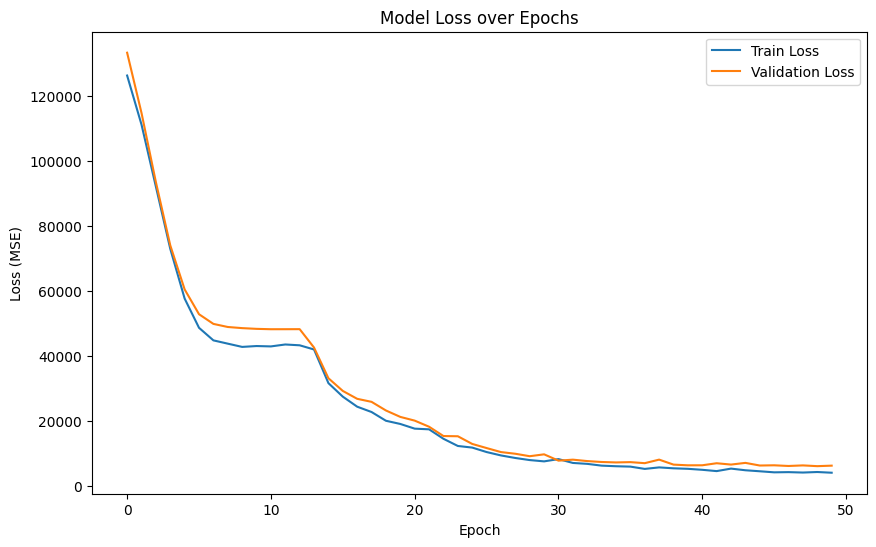

In [27]:

# بررسی خالی نبودن داده‌های اعتبارسنجی
if len(X_val) == 0 or len(y_val) == 0:
    raise ValueError("Validation data is empty! Check data splitting or preprocessing.")

# ساخت مدل هیبریدی CNN-LSTM
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, len(features)), padding='same'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    LSTM(50, activation='tanh', return_sequences=True),
    LSTM(25, activation='tanh'),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# کامپایل مدل
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# نمایش خلاصه مدل
model.summary()

# آموزش مدل
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# بررسی کلیدهای history.history
print("Available metrics in history:", list(history.history.keys()))

# ارزیابی مدل روی داده‌های تست
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.2f}")

# ذخیره معیارهای عملکرد
with open("model_performance.txt", "w", encoding="utf-8") as f:
    f.write("Hybrid CNN-LSTM Model Performance\n")
    f.write("=" * 40 + "\n")
    f.write(f"Test RMSE: {rmse:.2f}\n")
    f.write(f"Test R² Score: {r2:.2f}\n")
    f.write("=" * 40)

# رسم نمودار loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
else:
    print("Warning: No validation loss available. Plotting only train loss.")
plt.title("Model Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.savefig("model_loss_plot.png", dpi=300)
plt.show()


In [28]:
# ذخیره مدل
model.save("cnn_lstm_model.h5")

In [ ]:
# لود مدل ذخیره‌شده
model = load_model("cnn_lstm_model.h5")

In [29]:


# نمایش جزئیات مدل
print("\nModel Architecture:")
model.summary()



Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 24, 64)         │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 12, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 6, 50)          │        16,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 25)             │         7,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,831 (386.06 KB)

 Trainable params: 32,943 (128.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,888 (257.38 KB)

In [30]:

# ارزیابی مدل روی داده‌های تست
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"\nTest RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.2f}")

# ذخیره معیارهای عملکرد
with open("model_performance_reloaded.txt", "w", encoding="utf-8") as f:
    f.write("Hybrid CNN-LSTM Model Performance (Reloaded)\n")
    f.write("=" * 40 + "\n")
    f.write(f"Test RMSE: {rmse:.2f}\n")
    f.write(f"Test R² Score: {r2:.2f}\n")
    f.write("=" * 40)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Test RMSE: 66.55
Test R² Score: 0.86


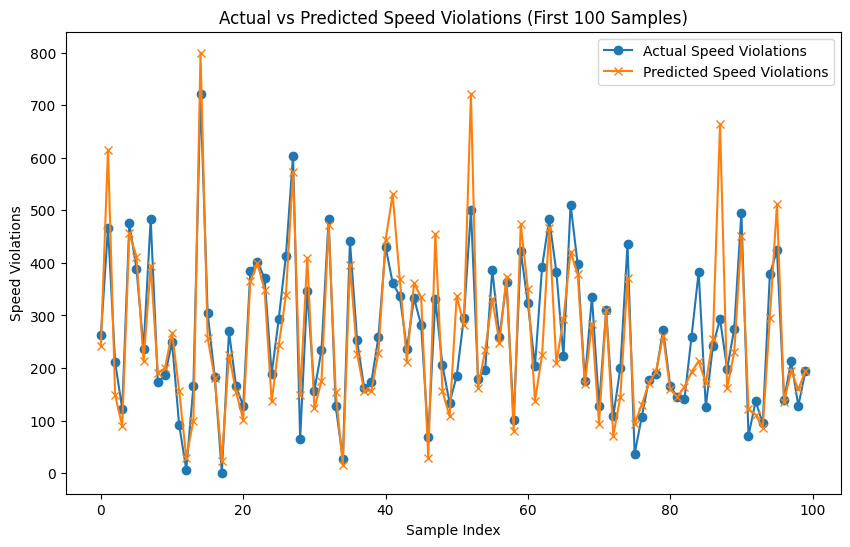

In [31]:

# ذخیره پیش‌بینی‌ها و مقادیر واقعی
predictions_df = pd.DataFrame({
    "Actual_Speed_Violations": y_test,
    "Predicted_Speed_Violations": y_pred.flatten()
})
predictions_df.to_csv("predictions.csv", index=False)

# رسم نمودار پیش‌بینی‌ها در مقابل مقادیر واقعی
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label="Actual Speed Violations", marker='o')
plt.plot(y_pred[:100], label="Predicted Speed Violations", marker='x')
plt.title("Actual vs Predicted Speed Violations (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Speed Violations")
plt.legend()
plt.savefig("actual_vs_predicted.png", dpi=300)
plt.show()


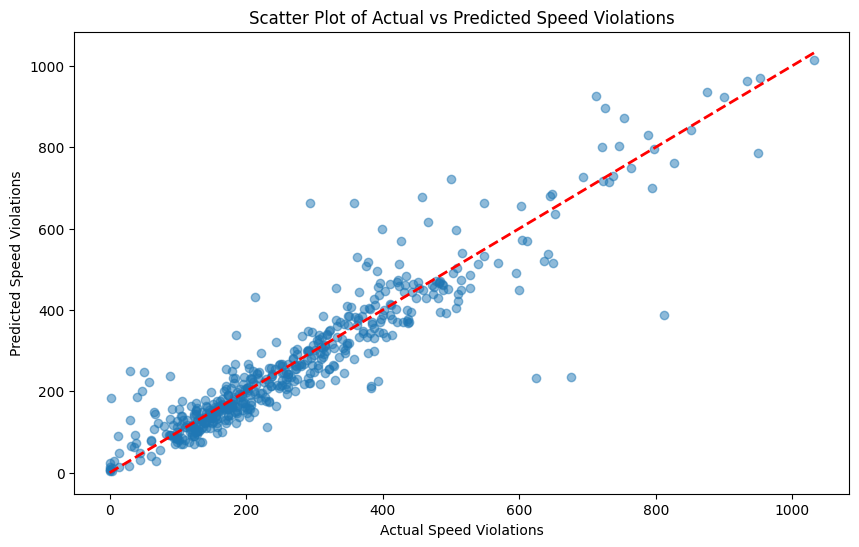

In [32]:

# رسم نمودار پراکندگی (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Scatter Plot of Actual vs Predicted Speed Violations")
plt.xlabel("Actual Speed Violations")
plt.ylabel("Predicted Speed Violations")
plt.savefig("scatter_plot.png", dpi=300)
plt.show()


In [33]:

# بررسی امکان رسم نمودار Loss (در صورت وجود تاریخچه)
# توجه: فایل h5 تاریخچه آموزش را ذخیره نمی‌کند
print("\nNote: Loss history is not available in the saved model. Provide history file if needed.")


Note: Loss history is not available in the saved model. Provide history file if needed.


In [34]:

# ارزیابی مدل روی داده‌های آموزش، اعتبارسنجی، و تست
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nPerformance Metrics:")
print(f"Train RMSE: {train_rmse:.2f}, Validation RMSE: {val_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
print(f"Train R²: {train_r2:.2f}, Validation R²: {val_r2:.2f}, Test R²: {test_r2:.2f}")

# ذخیره معیارهای عملکرد
with open("overfitting_analysis.txt", "w", encoding="utf-8") as f:
    f.write("Overfitting Analysis for Hybrid CNN-LSTM Model\n")
    f.write("=" * 50 + "\n")
    f.write(f"Train RMSE: {train_rmse:.2f}\n")
    f.write(f"Validation RMSE: {val_rmse:.2f}\n")
    f.write(f"Test RMSE: {test_rmse:.2f}\n")
    f.write(f"Train R²: {train_r2:.2f}\n")
    f.write(f"Validation R²: {val_r2:.2f}\n")
    f.write(f"Test R²: {test_r2:.2f}\n")
    f.write("=" * 50)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Performance Metrics:
Train RMSE: 57.17, Validation RMSE: 79.01, Test RMSE: 66.55
Train R²: 0.92, Validation R²: 0.87, Test R²: 0.86
